# 주제(가설) : 백신접종 여부가 코로나 확산을 저지시키는 효과가 있을까?

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

# 글꼴 설정 
plt.rcParams.update({'font.family':'Malgun Gothic','font.size':12}) #차트 글꼴 설정
plt.rc('axes',unicode_minus=False) #유니코드에서 음수 부호설정

# 데이터 설명 및 탐색
## 데이터 설명
* 데이터: 2020~2021년도 서울특별시_코로나19 확진자 현황, 2021년도 서울특별시 코로나19 백신 예방접종 현황
* 출처: 공공데이터포털 - 서울특별시
* 각 코드의 의미
    <서울특별시_코로나19 확진자 현황>
    - 서울시 기준일: 서울 기준 당일 일자 (2020년 2월 5일~2021년 12월 18일)
    - 서울시 확진자: 서울 누적 확진자 수
    - 서울시 추가 확진 : 서울의 새로 확진된 사람 수
    - 서울시 치료중: 현재 치료중인 환자 수 
    - 서울시 퇴원 : 누적 완치자 수
    - 서울시 추가 퇴원 : 당일 추가 완치자 수
    - 서울시 사망 : 누적 사망자 수 
    - 전국 확진: 전국 누적 확진자 수
    - 전국 추가 확진: 전국의 새로 확진된 사람 수
    
    <서울특별시 코로나19 백신 예방접종 현황>
    - 접종일: 코로나 접종일
    - 접종대상자: 해당 일자 기준 서울시 백신접종 대상자 사람 수
    - 1차접종 누계: 전국 1차 접종완료자 누적 수
    - 1차접종률(%) = (1차접종 누계/접종대상자)*100
    - 당일 추가접종자 수: 당일 잔여 백신 접종자
    - 추가접종 누계 : 잔여 백신 누적 접종자 수

## 파일 읽어오기

* 2개의 파일 읽어오기(서울특별시 코로나19 확진자 발생동향, 서울특별시 코로나19 백신 예방접종 현황)

In [259]:
df1 = pd.read_csv("서울특별시 코로나19 확진자 발생동향.csv", encoding="cp949")

In [260]:
# 데이터 행과 열 개수 출력
df1.shape

(684, 24)

In [261]:
# 데이터 모습을 확인하기 위해 첫 3개 데이터를 출력
df1.head(3)

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자
0,2021.12.18.00,199028,2794,45569,151980,1179,1479,NaN,NaN,NaN,...,451337,4644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021.12.17.00,196234,2846,43972,150801,2203,1461,NaN,NaN,NaN,...,448809,4591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021.12.16.00,193389,3057,43353,148598,456,1438,NaN,NaN,NaN,...,444970,4518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [262]:
df2 = pd.read_csv("서울특별시 코로나19 백신 예방접종 현황.csv", encoding="cp949")

In [263]:
# 데이터 행과 열 개수 출력
df2.shape

(242, 11)

In [264]:
# 첫 3개 데이터를 출력
df2.head(3)

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
0,2021.12.17,9505868,16484.0,8068292,84.9,12303.0,7840748,82.5,213984.0,2048239.0,41.5
1,2021.12.16,9505868,13183.0,8049235,84.7,8643.0,7825944,82.3,160375.0,1828394.0,37.1
2,2021.12.15,9505868,11851.0,8034078,84.5,7820.0,7815332,82.2,170057.0,1663071.0,17.5


## 데이터 탐색

In [265]:
# 데이터의 기본 정보 보기
# row의 개수 및 각 column의 정보 및 메모리 사용량을 확인
# Non-Null Count 가 목록에 안나오는 경우 : show_counts=True 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   서울시 기준일            684 non-null    object 
 1   서울시 확진자            684 non-null    int64  
 2   서울시 추가 확진          684 non-null    int64  
 3   서울시 치료중            684 non-null    int64  
 4   서울시 퇴원             684 non-null    int64  
 5   서울시 추가 퇴원          684 non-null    int64  
 6   서울시 사망             684 non-null    int64  
 7   서울시 의심환자 전체        187 non-null    float64
 8   서울시 의심환자 검사중       188 non-null    float64
 9   서울시 의심환자 검사결과(음성)  188 non-null    float64
 10  전국 기준일             684 non-null    object 
 11  전국 확진              684 non-null    int64  
 12  전국 추가 확진           684 non-null    int64  
 13  전국 치료중             684 non-null    int64  
 14  전국 퇴원              684 non-null    int64  
 15  전국 사망              684 non-null    int64  
 16  전국 의심환자 전체         187 non

In [266]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         242 non-null    object 
 1   접종대상자       242 non-null    int64  
 2   당일 1차접종자 수  241 non-null    float64
 3   1차접종 누계     242 non-null    int64  
 4   1차접종률(%)    242 non-null    float64
 5   당일 2차접종자 수  241 non-null    float64
 6   2차접종 누계     242 non-null    int64  
 7   2차접종률(%)    242 non-null    float64
 8   당일 추가접종자 수  72 non-null     float64
 9   추가접종 누계     67 non-null     float64
 10  추가접종률(%)    51 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 19.9+ KB


# 데이터 전처리 및 데이터 가공

## 불필요한 열 제거

In [267]:
# "확인중 확진자' 고유값 확인 (값이 거의 없음)
df1['확인중 확진자'].value_counts(dropna=False)

0.0    672
NaN     12
Name: 확인중 확진자, dtype: int64

In [268]:
# 서울시 기준일과 전국 기준일이 같다.
# 전국 기준일 제거해도 됨
df1[['서울시 기준일','전국 기준일']].head()

,서울시 기준일,전국 기준일
0,2021.12.18.00,2021.12.18.00
1,2021.12.17.00,2021.12.17.00
2,2021.12.16.00,2021.12.16.00
3,2021.12.15.00,2021.12.15.00
4,2021.12.14.00,2021.12.14.00


In [269]:
# 필요없는 전국 기준일,자가격리자 해외입국자 감시중, 자가격리자 해외입국자 감시해제, 자가격리자 접촉자 감시중, 자가격리자 접촉자 감시해제, 확인중 확진자 열 제거
df1.drop(columns=['전국 기준일','자가격리자 해외입국자 감시중','자가격리자 해외입국자 감시해제','자가격리자 접촉자 감시중','자가격리자 접촉자 감시해제','확인중 확진자'],axis=1, inplace=True)

In [270]:
# 제거되었는지 확인
df1.columns

Index(['서울시 기준일', '서울시 확진자', '서울시 추가 확진', '서울시 치료중', '서울시 퇴원', '서울시 추가 퇴원',
       '서울시 사망', '서울시 의심환자 전체', '서울시 의심환자 검사중', '서울시 의심환자 검사결과(음성)', '전국 확진',
       '전국 추가 확진', '전국 치료중', '전국 퇴원', '전국 사망', '전국 의심환자 전체', '전국 의심환자 검사중',
       '전국 의심환자 검사결과(음성)'],
      dtype='object')

## 결측치 확인

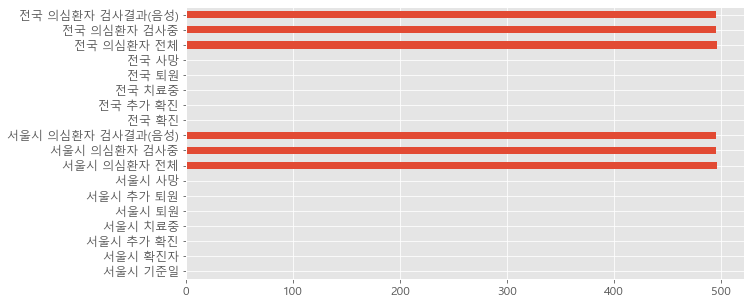

In [271]:
# 결측치를 시각화
plt.figure(figsize=(10,5))
df1.isnull().sum().plot(kind='barh')
plt.show()

# 일부데이터 확인하고 가공하기

* 서울시 기준일' 열의 날짜 데이터로 인덱싱하기 위해 시계열객체로 변경한다

In [272]:
# '서울시 기준일' 열의 날짜 데이터를 Timestamp 객체로 바꾼다.
df1['서울시 기준일'] = pd.to_datetime(df1['서울시 기준일'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   서울시 기준일            684 non-null    datetime64[ns]
 1   서울시 확진자            684 non-null    int64         
 2   서울시 추가 확진          684 non-null    int64         
 3   서울시 치료중            684 non-null    int64         
 4   서울시 퇴원             684 non-null    int64         
 5   서울시 추가 퇴원          684 non-null    int64         
 6   서울시 사망             684 non-null    int64         
 7   서울시 의심환자 전체        187 non-null    float64       
 8   서울시 의심환자 검사중       188 non-null    float64       
 9   서울시 의심환자 검사결과(음성)  188 non-null    float64       
 10  전국 확진              684 non-null    int64         
 11  전국 추가 확진           684 non-null    int64         
 12  전국 치료중             684 non-null    int64         
 13  전국 퇴원              684 non-null    int64         
 14  전국 사망     

In [273]:
# 데이터 타입 확인
type(df1['서울시 기준일'][0])

pandas._libs.tslibs.timestamps.Timestamp

## 2020~2021년 서울시 누적 확진자 수 

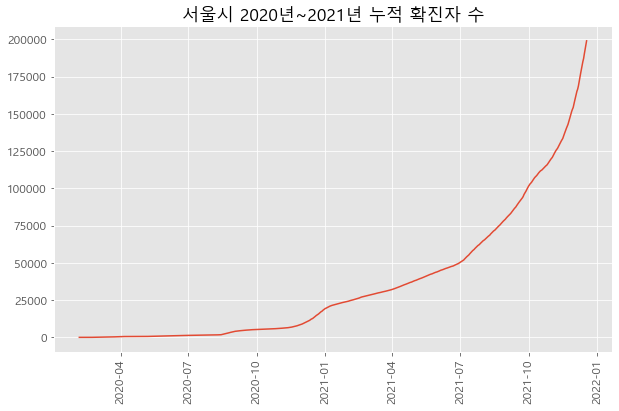

In [274]:
plt.figure(figsize=(10, 6))
plt.title('서울시 2020년~2021년 누적 확진자 수')

plt.xticks(rotation='vertical')
plt.plot('서울시 기준일', '서울시 확진자', data= df1)

* 누적확진자 수는 2021년도 후반부에 급속도로 상승하고 있다.

In [275]:
# '서울시 기준일' 열을 행 인덱스로 설정한다.
# 시계열 값을 행 인덱스로 지정하면 판다스는 DatatimeIndex로 저장한다.
# 시간 순서에 맞춰 인덱싱 하기 편리하다.
df1.set_index('서울시 기준일',inplace=True)
df1 = df1.sort_index()
df1.head()

,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),전국 확진,전국 추가 확진,전국 치료중,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성)
서울시 기준일,,,,,,,,,,,,,,,,,
2020-02-05 15:00:00,8,0,8,0,0,0,0.0,16.0,148.0,18,0,18,0,0,200.0,174.0,522.0
2020-02-06 09:00:00,11,0,11,0,0,0,192.0,28.0,164.0,24,0,23,1,0,591.0,169.0,693.0
2020-02-07 18:00:00,10,0,10,0,0,0,322.0,115.0,207.0,24,0,22,2,0,1106.0,264.0,842.0
2020-02-08 18:00:00,10,0,10,0,0,0,414.0,92.0,322.0,24,0,22,2,0,1677.0,620.0,1057.0
2020-02-09 18:00:00,10,0,10,0,0,0,459.0,45.0,414.0,27,0,24,3,0,2571.0,888.0,1683.0


* 확진자수는 2020년도 2월부터 2021년도 12월달까지 꾸준히 증가추세를 보이고 있다.

* 인덱싱을 편리하게 하기위해 시계열 객체를 행 인덱스로 지정한다.

In [276]:
# '접종일' 열의 날짜 데이터를 Timestamp 객체로 바꾼다.
df2['접종일'] = pd.to_datetime(df2['접종일'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   접종일         242 non-null    datetime64[ns]
 1   접종대상자       242 non-null    int64         
 2   당일 1차접종자 수  241 non-null    float64       
 3   1차접종 누계     242 non-null    int64         
 4   1차접종률(%)    242 non-null    float64       
 5   당일 2차접종자 수  241 non-null    float64       
 6   2차접종 누계     242 non-null    int64         
 7   2차접종률(%)    242 non-null    float64       
 8   당일 추가접종자 수  72 non-null     float64       
 9   추가접종 누계     67 non-null     float64       
 10  추가접종률(%)    51 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 20.9 KB


## 당일 1차, 2차 접종자수 그래프

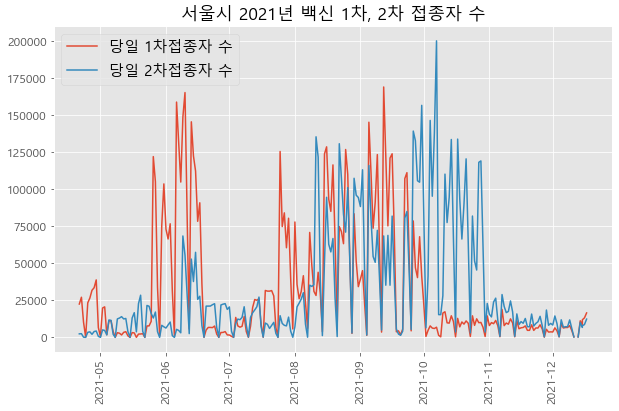

In [277]:
plt.figure(figsize=(10, 6))
plt.title('서울시 2021년 백신 1차, 2차 접종자 수')

plt.xticks(rotation='vertical')
plt.plot('접종일', '당일 1차접종자 수', data= df2)
plt.plot('접종일', '당일 2차접종자 수', data= df2)
plt.legend(loc='best',fontsize=15)

In [278]:
# '접종일' 열을 행 인덱스로 설정한다.
# 시계열 값을 행 인덱스로 지정하면 판다스는 DatatimeIndex로 저장한다.
# 시간 순서에 맞춰 인덱싱 하기 편리하다.
df2.set_index('접종일',inplace=True)
df2 = df2.sort_index()
df2.head()

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
접종일,,,,,,,,,,
2021-04-21,1019322,22501.0,291857,28.6,2358.0,13543,1.3,NaN,NaN,NaN
2021-04-22,1023538,27074.0,317386,31.0,2479.0,15901,1.6,NaN,NaN,NaN
2021-04-23,1027740,10195.0,345764,33.6,119.0,18376,1.8,NaN,NaN,NaN
2021-04-24,1023346,200.0,350427,34.2,0.0,18513,1.8,NaN,NaN,NaN
2021-04-25,1023346,23323.0,350631,34.2,3411.0,18513,1.8,NaN,NaN,NaN


In [279]:
# df1은 2020년도 2월 부터 데이터가 있음
print(df1.index.min())
print(df1.index.max())

2020-02-05 15:00:00
2021-12-18 00:00:00


In [280]:
# 백신접종은 2021년부터 이루어짐
print(df2.index.min())
print(df2.index.max())

2021-04-21 00:00:00
2021-12-17 00:00:00


## 누적 1차, 2차 접종자수

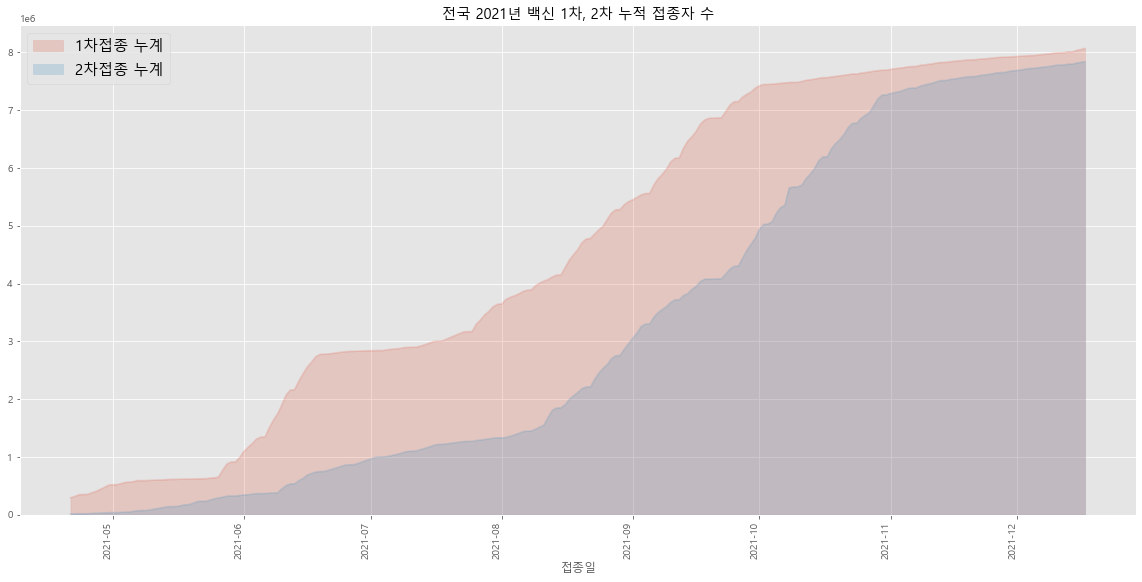

In [281]:
ax1 = df2[['1차접종 누계','2차접종 누계']]

plt.style.use('ggplot')

ax1.plot(kind='area', stacked = False, alpha = 0.2, figsize = (20,10))
plt.title('전국 2021년 백신 1차, 2차 누적 접종자 수')
plt.xticks(rotation='vertical')
plt.legend(loc='best',fontsize=15)

In [282]:
# 두 데이터 프레임의 행 인덱스를 기준으로 결합
df3 = df1.join(df2)
df3.head()

,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),전국 확진,...,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%)
2020-02-05 15:00:00,8,0,8,0,0,0,0.0,16.0,148.0,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-06 09:00:00,11,0,11,0,0,0,192.0,28.0,164.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-07 18:00:00,10,0,10,0,0,0,322.0,115.0,207.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-08 18:00:00,10,0,10,0,0,0,414.0,92.0,322.0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-09 18:00:00,10,0,10,0,0,0,459.0,45.0,414.0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 685 entries, 2020-02-05 15:00:00 to 2021-12-18 00:00:00
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   서울시 확진자            685 non-null    int64  
 1   서울시 추가 확진          685 non-null    int64  
 2   서울시 치료중            685 non-null    int64  
 3   서울시 퇴원             685 non-null    int64  
 4   서울시 추가 퇴원          685 non-null    int64  
 5   서울시 사망             685 non-null    int64  
 6   서울시 의심환자 전체        187 non-null    float64
 7   서울시 의심환자 검사중       188 non-null    float64
 8   서울시 의심환자 검사결과(음성)  188 non-null    float64
 9   전국 확진              685 non-null    int64  
 10  전국 추가 확진           685 non-null    int64  
 11  전국 치료중             685 non-null    int64  
 12  전국 퇴원              685 non-null    int64  
 13  전국 사망              685 non-null    int64  
 14  전국 의심환자 전체         187 non-null    float64
 15  전국 의심환자 검사중        188 non-null    fl

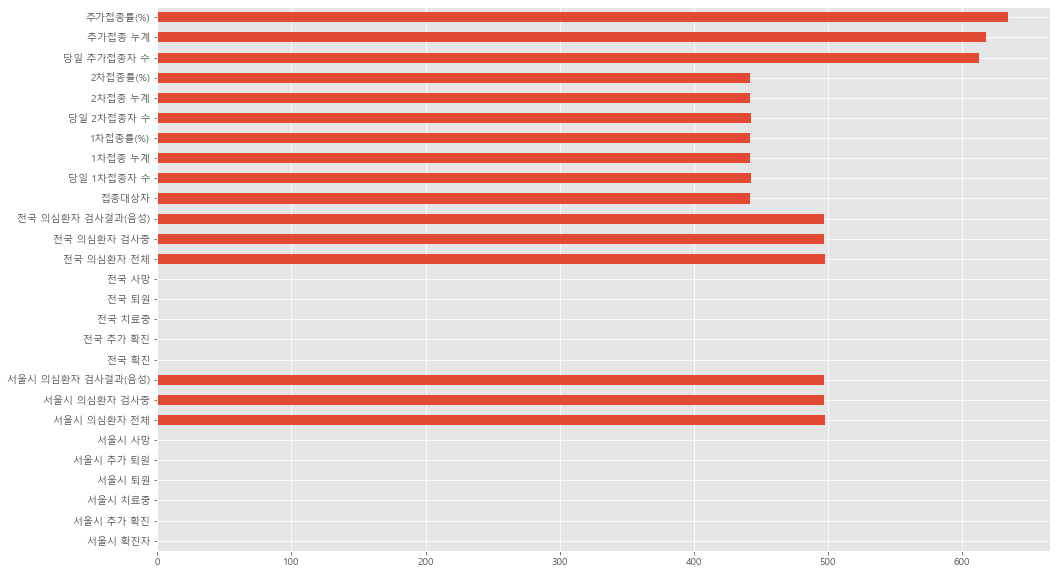

In [284]:
# 결측치를 시각화
plt.figure(figsize=(16,10))
df3.isnull().sum().plot(kind='barh')
plt.show()

## 데이터 시각화

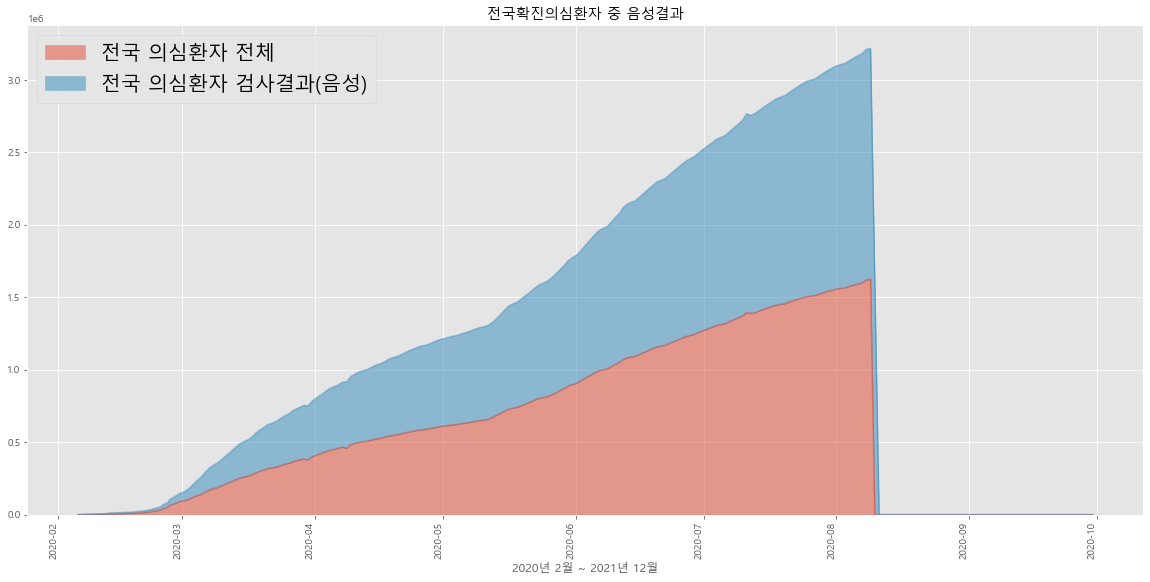

In [285]:
# 전국 의심환자 중 음성 결과가 나온 환자 수를 면적 그래프로 추출
corna_doubt = df3.loc[:'2020-09',['전국 의심환자 전체','전국 의심환자 검사결과(음성)']]
corna_doubt.plot(kind='area',stacked=True, alpha=0.5,figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title('전국확진의심환자 중 음성결과')
plt.xlabel('2020년 2월 ~ 2021년 12월')
plt.legend(loc='best',fontsize=20)
plt.show()

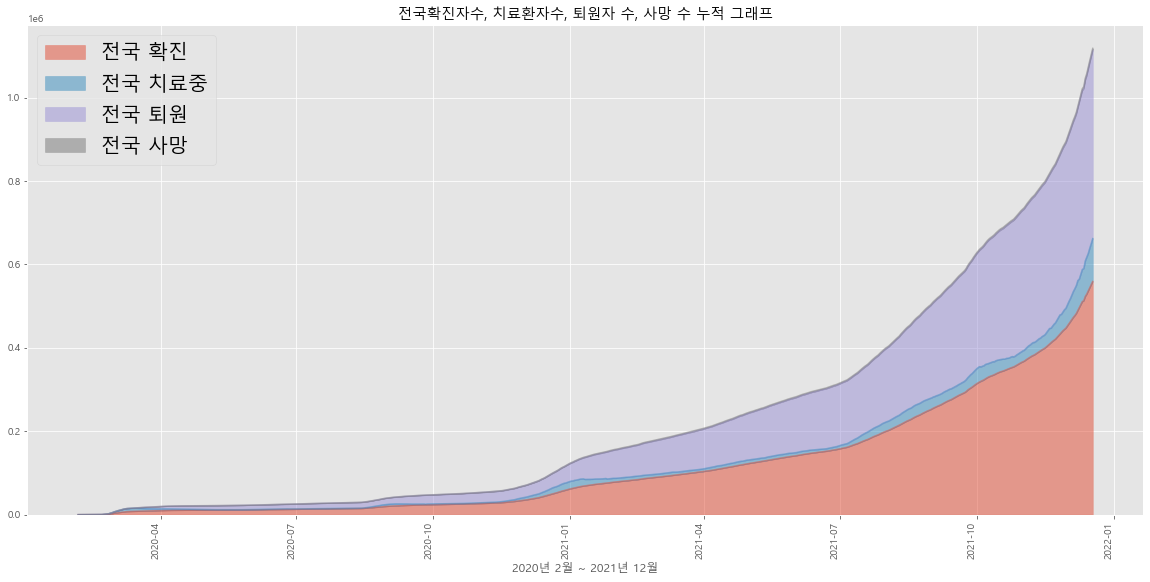

In [286]:
# stacked=True로 설정하여 그래프 누적 시각화
k_corna = df3.loc[:,['전국 확진','전국 치료중','전국 퇴원','전국 사망']]
k_corna.plot(kind='area',stacked=True, alpha=0.5,figsize=(20,10))
plt.xticks(rotation='vertical')
plt.title('전국확진자수, 치료환자수, 퇴원자 수, 사망 수 누적 그래프')
plt.xlabel('2020년 2월 ~ 2021년 12월')
plt.legend(loc='best',fontsize=20)
plt.show()

### 2020년도/ 2020년도 추가확진자, 총 확진자

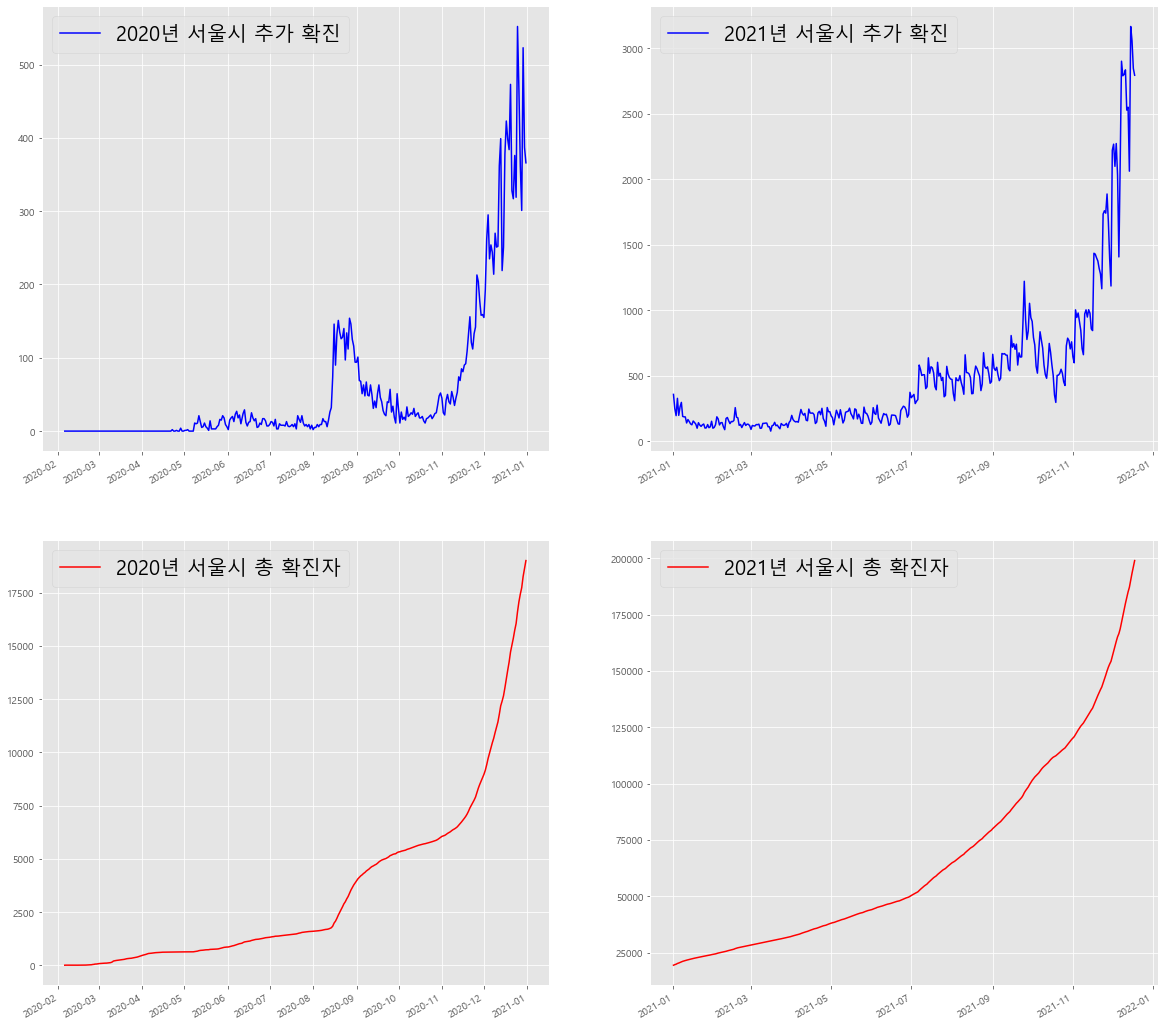

In [287]:
plt.figure(figsize=(20,20))

df3_2020 = df3.loc['2020']
df3_2021 = df3.loc['2021']

plt.subplot(221)
df3_2020['서울시 추가 확진'].plot(kind='line',color='blue',label="2020년 서울시 추가 확진")
plt.legend(loc='best',fontsize=20)

plt.subplot(222)
df3_2021['서울시 추가 확진'].plot(kind='line',color='blue',label="2021년 서울시 추가 확진")
plt.legend(loc='best',fontsize=20)

plt.subplot(223)
df3_2020['서울시 확진자'].plot(kind='line',color='red',label="2020년 서울시 총 확진자")
plt.legend(loc='best',fontsize=20)

plt.subplot(224)
df3_2021['서울시 확진자'].plot(kind='line',color='red',label="2021년 서울시 총 확진자")
plt.legend(loc='best',fontsize=20)

plt.show()

#### 백신접종이 이루어진 2021년에도 2020년과 비슷한 그래프 추이를 보임

*  확진자의 수는 2020년에 비해 2021년도가 월등히 높지만 증가 추세는 비슷한 것으로 보임
* 이는 백신접종이 이루어진 2021년과 증가추세는 비슷한 것으로 보면 백신이 코로나 확산에 영향을 주지는 않는다 말할 수 있다. 

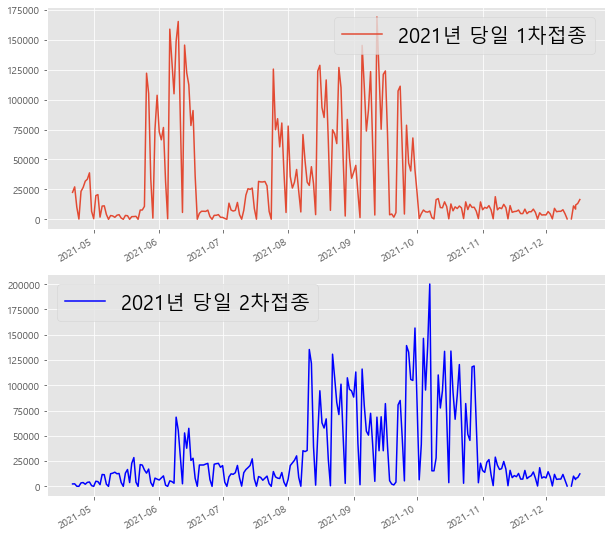

In [288]:
plt.figure(figsize=(10,10))

plt.subplot(211)
df3_2021['당일 1차접종자 수'].plot(kind='line',label="2021년 당일 1차접종")
plt.legend(loc='best',fontsize=20)

plt.subplot(212)
df3_2021['당일 2차접종자 수'].plot(kind='line',color='blue',label="2021년 당일 2차접종")
plt.legend(loc='best',fontsize=20)

plt.show()

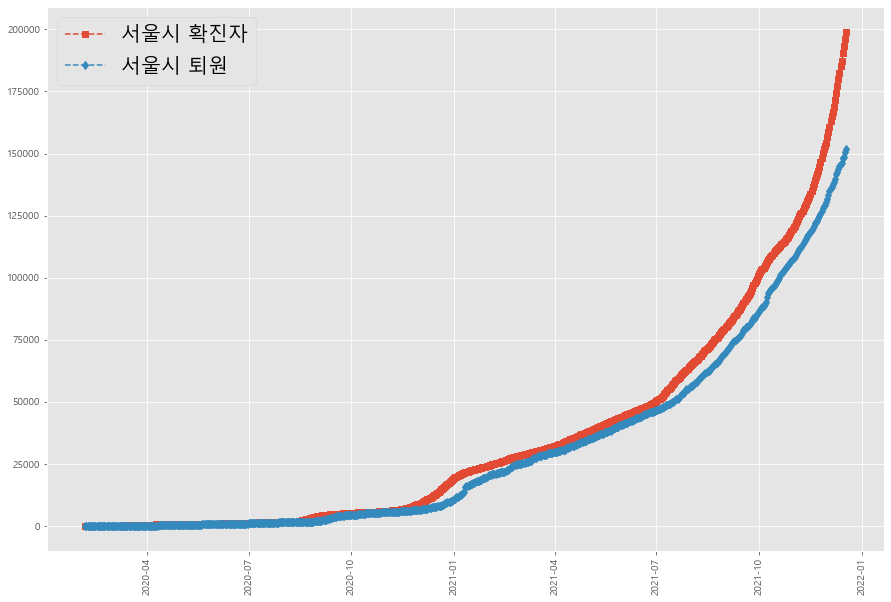

In [289]:
plt.figure(figsize=(15,10))
plt.plot(df3.index, df3['서울시 확진자'],'s--',label='서울시 확진자')
plt.plot(df3.index, df3['서울시 퇴원'],'d--',label='서울시 퇴원')
plt.xticks(rotation='vertical')
plt.legend(loc='best',fontsize=20)
plt.show()

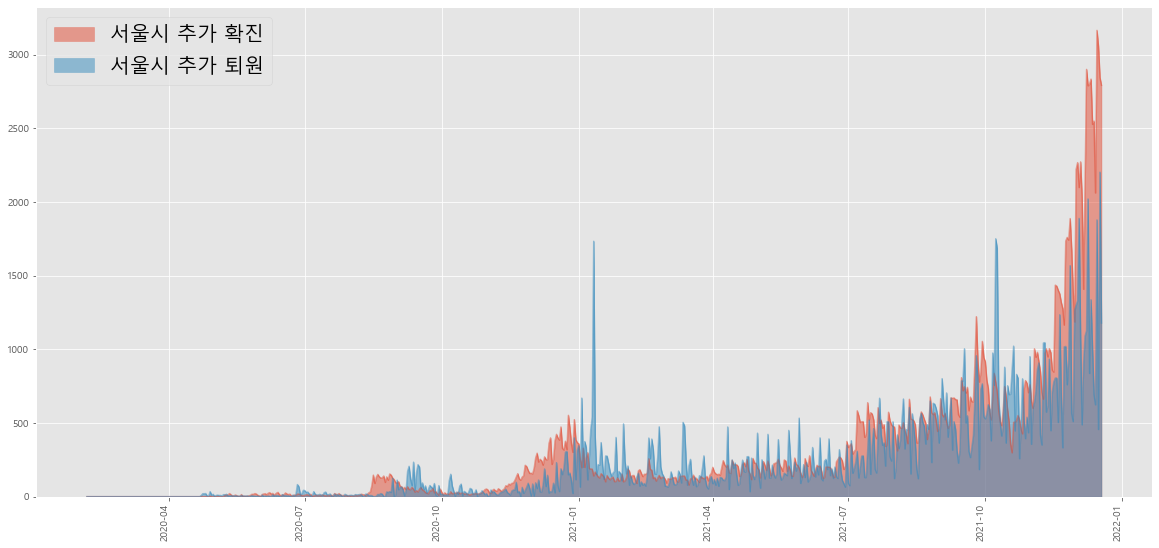

In [290]:
df3['서울시 추가 확진'].plot(kind='area',stacked=True, alpha=0.5,figsize=(20,10))
df3['서울시 추가 퇴원'].plot(kind='area',stacked=True, alpha=0.5,figsize=(20,10))
plt.xticks(rotation='vertical')
plt.legend(loc='best',fontsize=20)
plt.show()

* 확진자 수가 느는 만큼 퇴원하는 환자의 수도 늘고있음을 알수 있다.

## 확진자수와 퇴원자 수의 그래프 추이가 비슷함
* 즉, 확진자 수가 증가하는 만큼 완치자의 수도 증가함

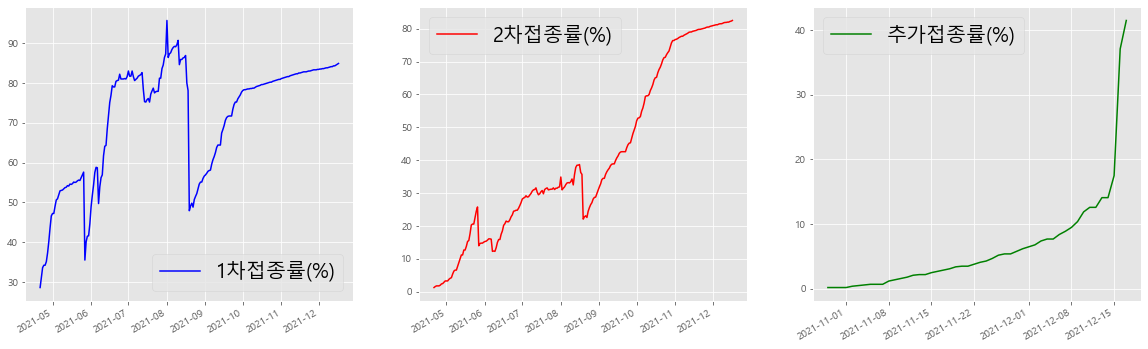

In [291]:
plt.figure(figsize=(20,6))
plt.subplot(131)
df3["1차접종률(%)"].plot(kind='line',color='blue')
plt.legend(loc='best',fontsize=20)

plt.subplot(132)
df3["2차접종률(%)"].plot(kind='line',color='red')
plt.legend(loc='best',fontsize=20)

plt.subplot(133)
df3["추가접종률(%)"].plot(kind='line',color='green')
plt.legend(loc='best',fontsize=20)

plt.show()

* 1차 접종률은 초반에 상승세를 보였고 2차 접종률은 1차 접종률 이후 2주가 지나야 맞을 수 있으므로 상승세가 1차 접종률보다 조금 늦음을 알 수 있다.
* 백신접종률은 2021년 후반부에 급격히 상승함을 알수 있다.

## 일부데이터 확인

In [292]:
# 확진자와 백신 관계 확인하기 위해 데이터 추출
df4 = df3[['서울시 확진자','당일 1차접종자 수','당일 2차접종자 수']]
df4.head()

,서울시 확진자,당일 1차접종자 수,당일 2차접종자 수
2020-02-05 15:00:00,8,NaN,NaN
2020-02-06 09:00:00,11,NaN,NaN
2020-02-07 18:00:00,10,NaN,NaN
2020-02-08 18:00:00,10,NaN,NaN
2020-02-09 18:00:00,10,NaN,NaN


### 1차, 2차 누적 접종자 수와 확진자 수의 관계

In [293]:
# 2020년도 인덱싱
# 2021년도 인덱싱
df4_2020 = df4.loc['2020']
df4_2021 = df4.loc['2021']

<Figure size 1440x432 with 0 Axes>

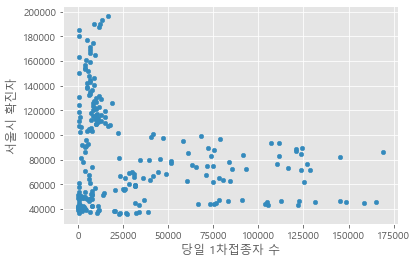

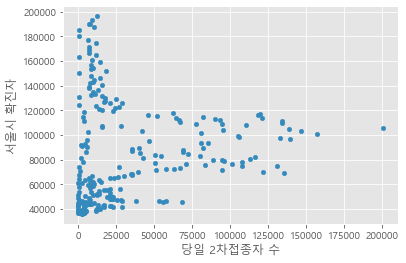

In [294]:
plt.figure(figsize=(20,6))

df4_2021.plot(kind='scatter',x='당일 1차접종자 수',y='서울시 확진자')

df4_2021.plot(kind='scatter',x='당일 2차접종자 수',y='서울시 확진자')

plt.show()

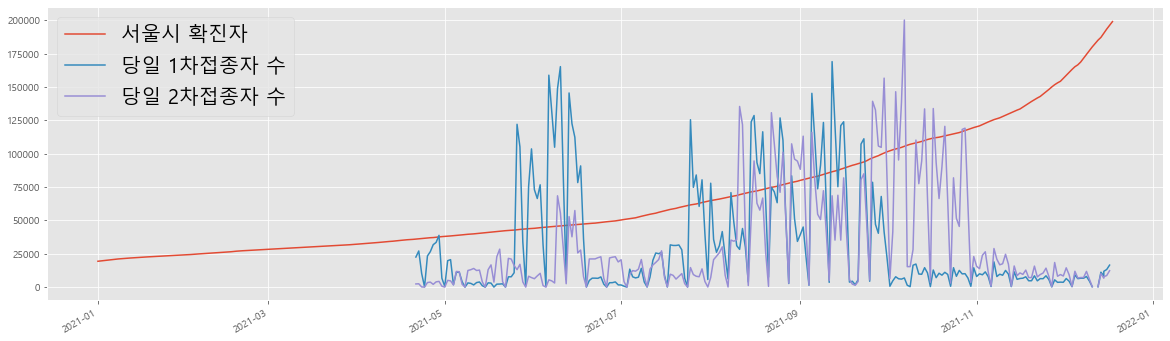

In [295]:
# 2021년도 확진자, 접종자 비교
df4_2021.plot(figsize=(20,6))
plt.legend(loc='best',fontsize=20)

* 백신 접종이 시작되어도 코로나 확진 추세를 늦추지 않는다는 것을 보여줌

In [296]:
# 확진자와 백신 관계 확인하기 위해 데이터 추출
df5 = df3[['서울시 확진자','1차접종률(%)','당일 2차접종자 수']]
df4.head()

,서울시 확진자,당일 1차접종자 수,당일 2차접종자 수
2020-02-05 15:00:00,8,NaN,NaN
2020-02-06 09:00:00,11,NaN,NaN
2020-02-07 18:00:00,10,NaN,NaN
2020-02-08 18:00:00,10,NaN,NaN
2020-02-09 18:00:00,10,NaN,NaN


## 월별 확진자수

Text(0, 0.5, '추가 확진자 수')

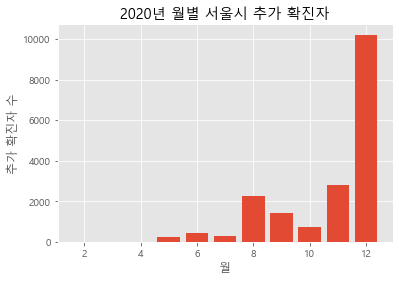

In [297]:
# 2020년도 추가 확진자수를 월별로 합산
month_2020 = []
for x in  range(2,13,1):
    month_2020.append(df3.loc['2020-' + str(x)]['서울시 추가 확진'].sum())

plt.bar(range(2,13,1), month_2020)
plt.title('2020년 월별 서울시 추가 확진자')
plt.xlabel('월')
plt.ylabel('추가 확진자 수')

Text(0, 0.5, '추가 확진자 수')

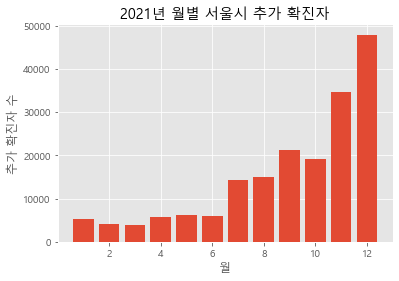

In [298]:
# 2020년도 추가 확진자수를 월별로 합산
month_2021 = []
for x in  range(1,13,1):
    month_2021.append(df3.loc['2021-' + str(x)]['서울시 추가 확진'].sum())

plt.bar(range(1,13,1), month_2021)
plt.title('2021년 월별 서울시 추가 확진자')
plt.xlabel('월')
plt.ylabel('추가 확진자 수')

* 겨울이 되면 확진자 수가 급등하는 것을 알 수 있음

Text(0, 0.5, '1차접종자 수')

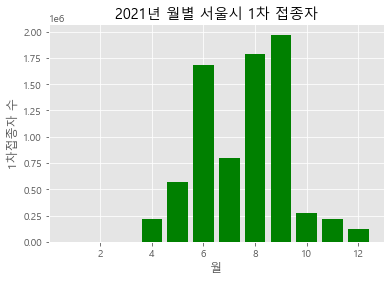

In [300]:
month_2021 = []
for x in  range(1,13,1):
    month_2021.append(df3.loc['2021-' + str(x)]['당일 1차접종자 수'].sum())

plt.bar(range(1,13,1), month_2021,color='green')
plt.title('2021년 월별 서울시 1차 접종자')
plt.xlabel('월')
plt.ylabel('1차접종자 수')

Text(0, 0.5, '2차접종자 수')

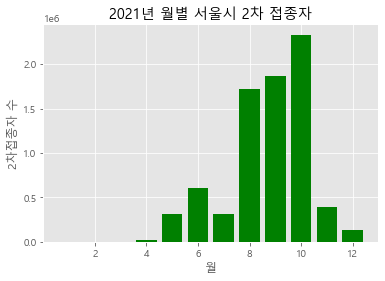

In [301]:
month_2021 = []
for x in  range(1,13,1):
    month_2021.append(df3.loc['2021-' + str(x)]['당일 2차접종자 수'].sum())

plt.bar(range(1,13,1), month_2021,color='green')
plt.title('2021년 월별 서울시 2차 접종자')
plt.xlabel('월')
plt.ylabel('2차접종자 수')

# 결론: 

* 백신접종이 없는 2020년도와 백신 접종이 이루어진 2021년도의 확진자 추세를 비교했을 때 비슷한 기울기로 상승하는 그래프가 출력된 것을
보아 백신이 코로나 확진을 저지시키지 않음을 알 수 있다.
* 확진자 수가 많은 만큼 완치자의 수도 많음을 알 수 있었다.
* 확진자 수의 상승과 함께 1차, 2차 백신접종률도 2021년도 후반부에 급격히 상승하고 있다.
* 날씨가 추워지면 확진자 수가 급등한다.